## Unsuprvised ML
### Most of the applications of Machine Learning today are based on super‐ vised learning (and as a result, this is where most of the investments go to), the vast majority of the available data is actually unlabeled: we have the input features X, but we do not have the labels y
### Clustering: the goal is to group similar instances together into clusters. This is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.
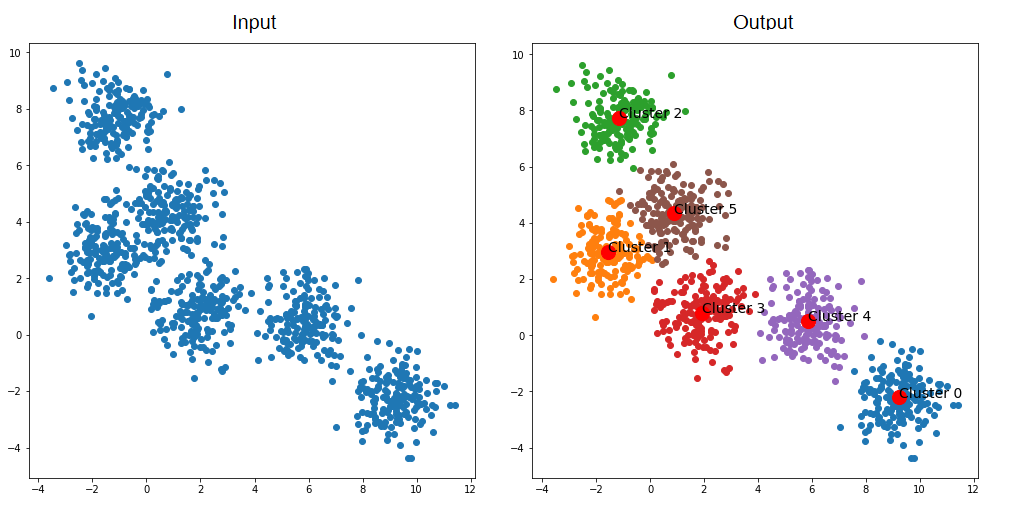
### Clustering is used in a wide variety of applications, including:
### For customer segmentation:you can cluster your customers based on their purchases, their activity on your website, and so on. 
### For data analysis:when analyzing a new dataset, it is often useful to first discover clusters of similar instances
### As a dimensionality reduction technique
### For anomaly detection (also called outlier detection): any instance that has a low affinity to all the clusters is likely to be an anomaly
### For semi-supervised learning: if you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster.
### For search engines: for example, some search engines let you search for images that are similar to a reference image. 
### To segment an image: by clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster

## K-Means
### Consider the unlabeled dataset represented in The next figure you can clearly see 5 blobs of instances. 
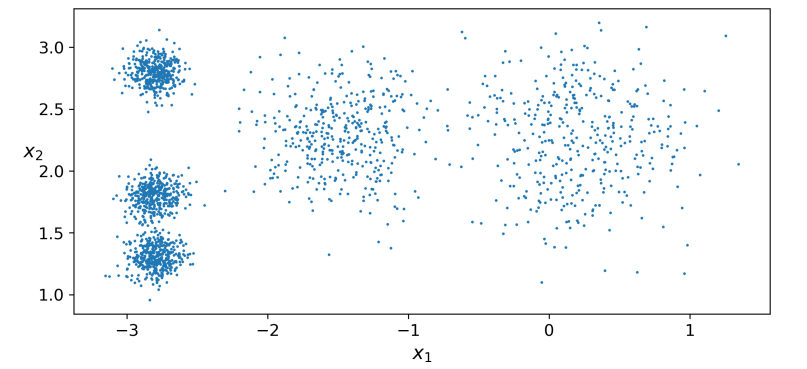
### The K-Means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently,You can see the result of k-means on this data set 
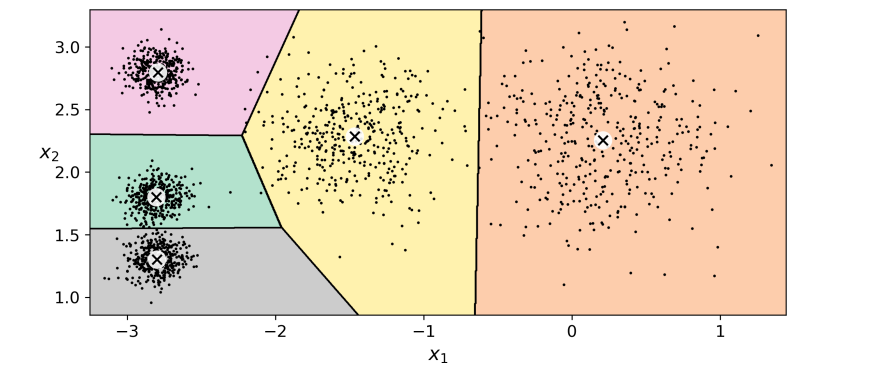



## How The kmeans works ?
### Start by placing the centroids randomly by picking k instances at random and using their locations as centroids
### Then label the instances by assign every instance to the nearest centroid
### Then calculate the mean of every group assigned to same centroid and set it to become  the new centroid 
### Then label every instance to the new centroids 
### Will repeat this steps until ?? until the centroids stop moving
### The algorithm is guaranteed to converge in a finite number of steps (usually quite small)
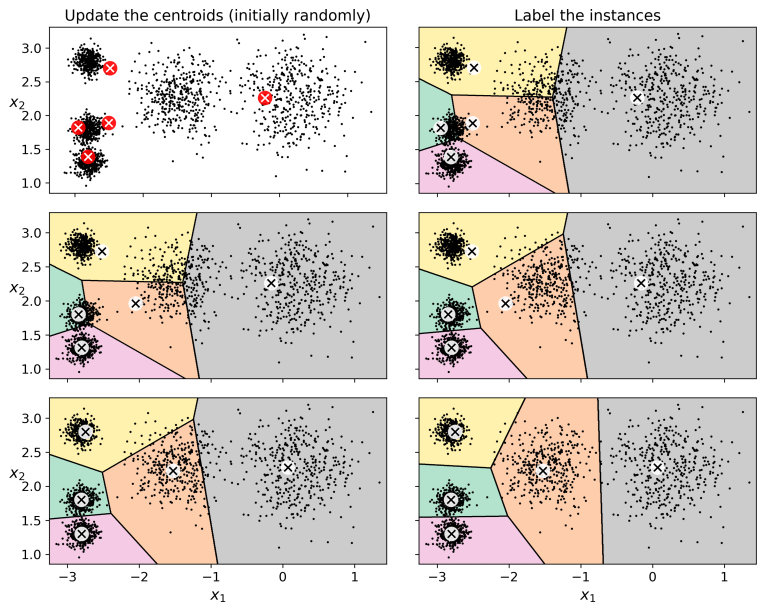
### Unfortunately, although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): this depends on the centroid initialization. For example, The next Figure shows two sub-optimal solutions that the algorithm can converge to if you are not lucky with the random initialization step
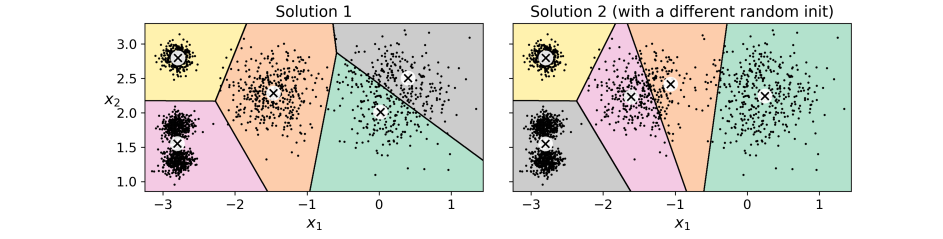

## Kmeans Hyperparameters 
### 1- Finding the Optimal Number of Clusters (K)
### 2-Seeds-Intial values of the centroides
### 3-Distance Measure (The way you will measure the distance between the points)


# Finding the Optimal Number of Clusters
### In general, it will not be so easy to know how to set k, and the result might be quite bad if you set it to the wrong value. For example, as you can see in the next Figure , setting k to 3 or 8 results in fairly bad models:
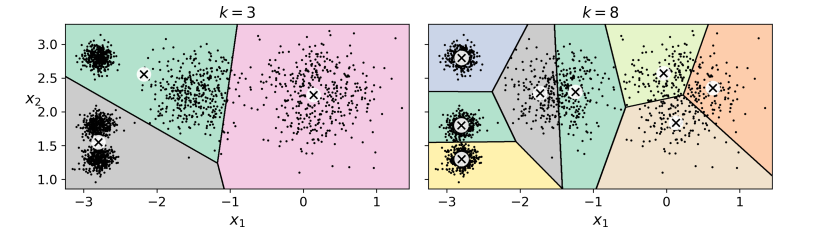
# Note : 
## What's the model inertia ??
## Model’s inertia: this is the mean squared distance between each instance and its closest centroid.
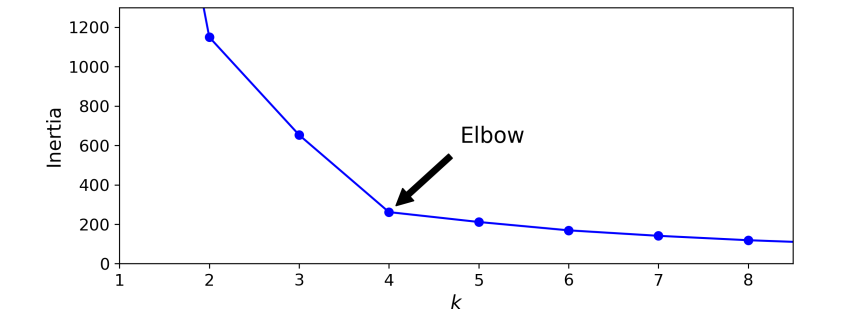
### From above Figure,You might be thinking that we could just pick the model with the lowest inertia, right? Unfortunately, it is not that simple. The inertia for k=3 is 653.2, which is much higher than for k=5 (which was 211.6), but with k=8, the inertia is just 119.1. The inertia is not a good performance metric when trying to choose k since it keeps getting lower as we increase k. Indeed
### As you can see, the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k. This curve has roughly the shape of an arm, and there is an “elbow” at k=4 so if we did not know better, it would be a good choice: any lower value would be dramatic, while any higher value would not help much, and we might just be splitting perfectly good clusters in half for no good reason.
## So There's another method to can choose the value of k (mean silhouette coefficient)

## Mean silhouette coefficient
### The silhouette coefficient is a metric that doesn't need to know the labeling of the dataset. It gives an idea of the separation between clusters.

### It is composed of two different elements:

  ###  The mean distance between a sample and all other points in the same class (a)
  ###  The mean distance between a sample and all other points in the nearest cluster (b)
### The formula for this coefficient s is defined as follows:
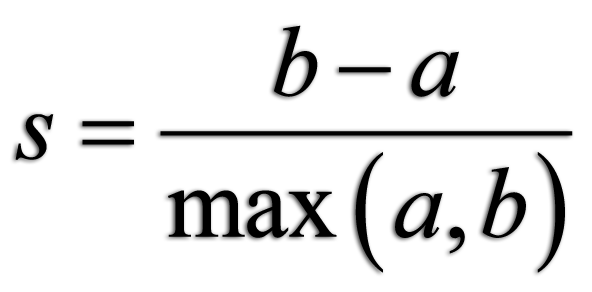

                 -----------------------------------------------------------------------------------------------------
## First Step is calculate the average distance from every instance and all the point are in the same cluster with this instance a(i)

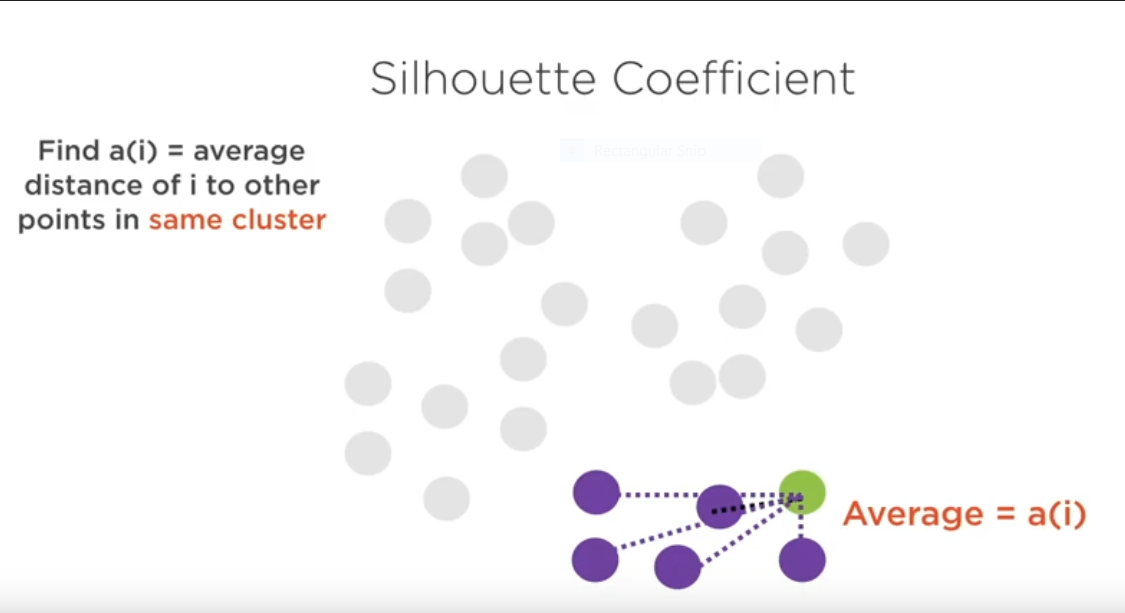
## Second step is calculate the average distance from the same instance to all point are in the nearest cluster with this instance b(i)
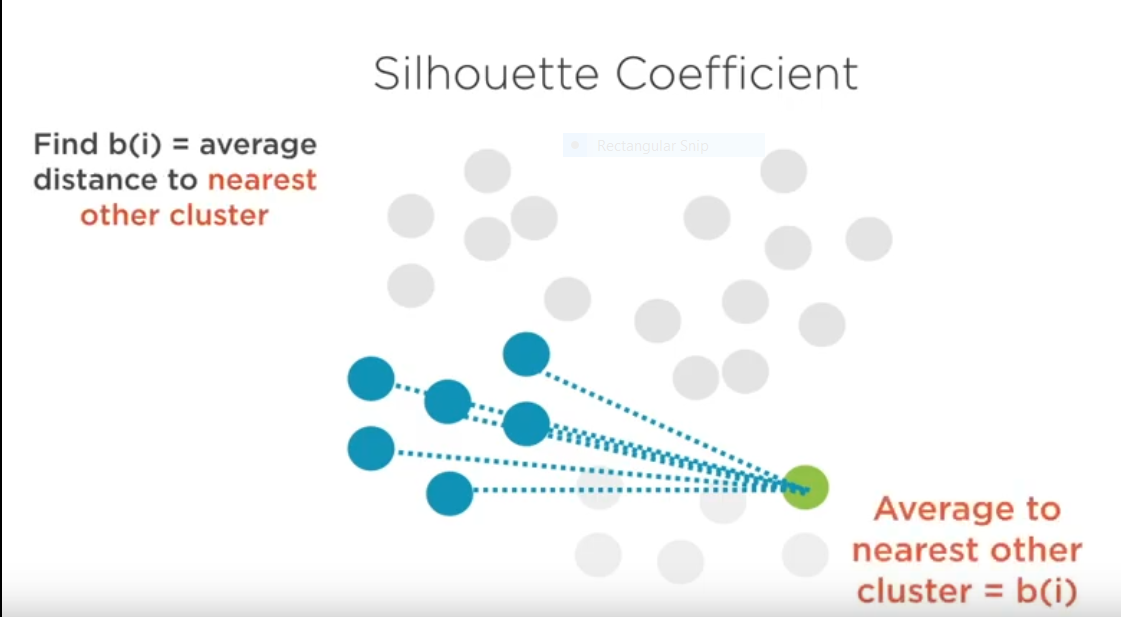

# Notes : 
## -Ideal we need a(i)<<<<b(i) to not miss classify this point 
## -s(i) =silhouette coefficient
## -s(i) = above formula
## -s(i) is ranged from -1 to 1 the best s(i) is 1 and worst is -1
## -ideal a(i)=0 b(i)= infinty  s(i)=1
## -worst case a(i)=infinty b(i)=0 s(i)=-1  [Some times it's called outlayer since it's missclassfied]

## So we need to draw the silhouette coefficent for every value of k we can try and get which valve not contanis an outlayers(missclassfication) and has high value for the silhouette coefficent 
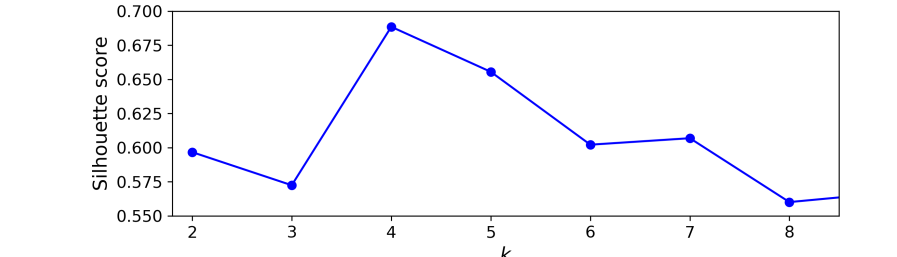
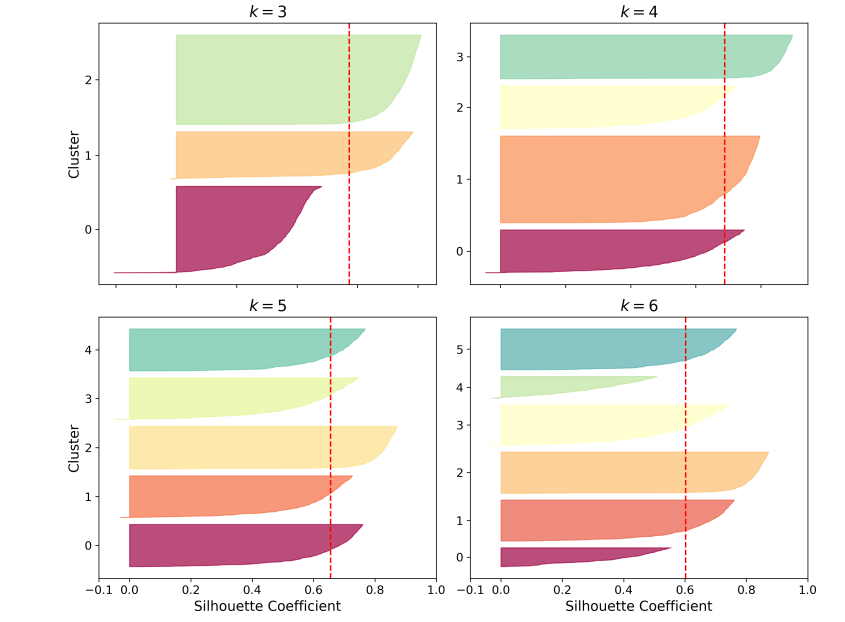
## From above figures we can use the k=4 or k=5 to become our values 

# Seeds-Intial values of the centroides

## run the algorithm multiple times with different random initializations and keep the best solution. 

# Implemention 

In [78]:
#Import the need libaries 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
# from yellowbrick.cluster import SilhouetteVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

## Load The data

In [3]:
data=load_iris()

## The Features and classes in the data

In [7]:
print("Flower features are:",data.feature_names)
print("The flowers classes",data.target_names)

Flower features are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The flowers classes ['setosa' 'versicolor' 'virginica']


## Convert the data to pandas data frame

In [12]:
## Conc the data featuers and the target  in one numpy array
conc_arr=np.c_[data['data'],data["target"]]
## convert the data to pandas data frame
Data_Frame=pd.DataFrame(data=conc_arr,columns=data.feature_names+["Target"])

## The head of the data

In [14]:
Data_Frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Data shape

In [15]:
Data_Frame.shape

(150, 5)

## Data describe

In [16]:
Data_Frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## plot the featuers of the data 

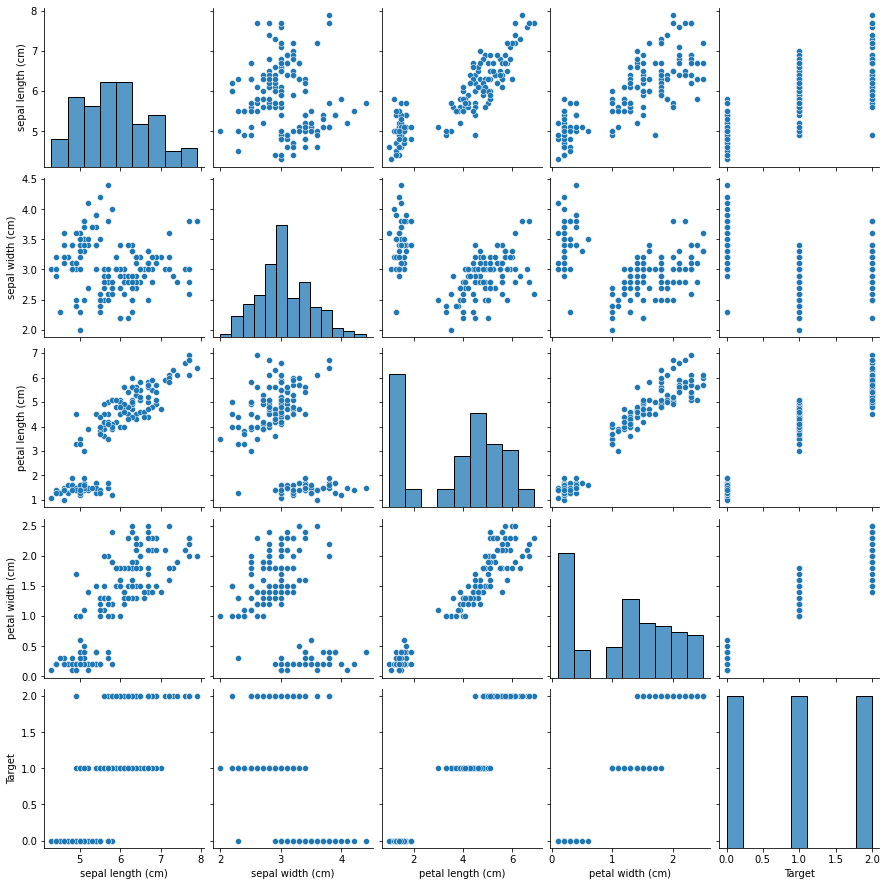

In [17]:
sns.pairplot(Data_Frame)

## Spliting the data train and test

In [19]:
x_train,x_test,y_train,y_test=train_test_split(Data_Frame.iloc[:,:-1],Data_Frame.iloc[:,-1],test_size=0.2,random_state=0)

### n_clustersint, default=8
###### The number of clusters to form as well as the number of centroids to generate.
### init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
###### ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
### n_initint, default=10
###### Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
### max_iterint, default=300
##### Maximum number of iterations of the k-means algorithm for a single run.

# Using Elbow Method To get the value of K

In [21]:
inertia=[]
for k in range(1,9):
    kmean=KMeans(n_clusters=k,random_state=0)
    kmean.fit(x_train)
    inertia.append(kmean.inertia_)
inertia

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[558.9241666666666,
 129.20566841617787,
 63.19666666666666,
 45.6644103457518,
 36.05660237154151,
 29.752634117573244,
 26.476985632724762,
 23.28315219421103]

Text(0.5, 1.0, 'elbow method')

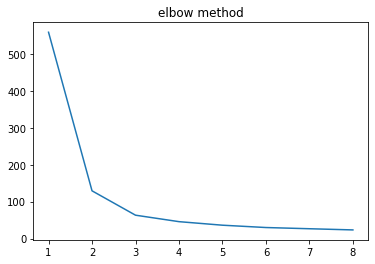

In [24]:
plt.plot(range(1,9),inertia)
plt.title("elbow method")

## From the elboow method we can get the best value for k is 3

# Using the silhouette coefficent


In [43]:
sil_cof=[]
for k in range(3,9):
    kmean=KMeans(n_clusters=k,random_state=42)
    kmean.fit(x_train)
    sil_cof.append(silhouette_score(x_train, kmean.labels_))
    
sil_cof

[0.557255028695464,
 0.5004109869361978,
 0.49962158054198963,
 0.391620110664928,
 0.38627722107335305,
 0.38913144266213273]

Text(0.5, 1.0, 'silhouette coefficent')

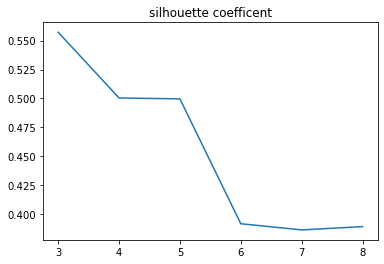

In [45]:
plt.plot(range(3,9),sil_cof)
plt.title("silhouette coefficent")

### From silhouette coefficent k=3 is best value

## Now will train the model again with last value of k=3

In [50]:
last_model=KMeans(n_clusters=3)
last_model.fit(x_train)

KMeans(n_clusters=3)

In [52]:
last_model.cluster_centers_

array([[5.02051282, 3.4025641 , 1.46153846, 0.24102564],
       [6.87777778, 3.08888889, 5.69444444, 2.06666667],
       [5.82888889, 2.72222222, 4.35333333, 1.42222222]])

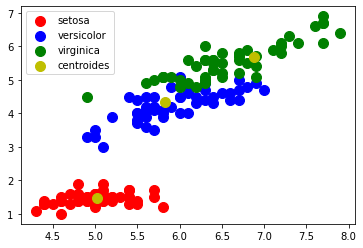

In [77]:
plt.scatter(data['data'][data['target']==0,0],data['data'][data['target']==0,2],s=100,c='r',label=data.target_names[0])
plt.scatter(data['data'][data['target']==1,0],data['data'][data['target']==1,2],s=100,c='b',label=data.target_names[1])
plt.scatter(data['data'][data['target']==2,0],data['data'][data['target']==2,2],s=100,c='g',label=data.target_names[2])
plt.scatter(last_model.cluster_centers_[:,0],last_model.cluster_centers_[:,2],s=100,c='y',label="centroides")
plt.legend()